In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, time
from sklearn.metrics import mean_squared_error

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN,LSTM
from keras.layers import Dropout

In [3]:
path = r"C:\Users\Angeliki\Anaconda3\1Sadia\My work\Data"
rpath = r"C:\Users\Angeliki\Anaconda3\1Sadia\My work\LSTM\Results"

In [4]:
data = pd.read_csv(path+"/Netflix dataset.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop('Close',axis=1)

In [5]:
# Normalizing the train data
from sklearn.preprocessing import MinMaxScaler
def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
    return df
data_normalized = normalize_data(data)[["Open","High","Low","Volume","Adj Close"]]
data_normalized.head(5)

,Open,High,Low,Volume,Adj Close
0,0.061253,0.038304,0.041331,0.186150,0.044516
1,0.030059,0.035640,0.030273,0.198264,0.069548
2,0.071243,0.048408,0.072770,0.135690,0.067015
3,0.072334,0.037683,0.041265,0.141320,0.035430
4,0.043474,0.011436,0.010729,0.272902,0.034053


In [6]:
def load_data(stock, seq_len, split_percent):
    amount_of_features = len(stock.columns) # 5
    data =stock.values 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(split_percent * result.shape[0]) # 80% split
    train = result[:int(row), :] # 80% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]


def build_model(layers):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(layers[1], layers[0])))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
        # adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model
    
        


In [7]:
window = 10
split_percent = 0.8
X_train, y_train, X_test, y_test = load_data(data_normalized,window,split_percent)


In [8]:
model = build_model([5,window,1])
model.fit(X_train,y_train,batch_size=64,epochs=100,validation_split=0.1,verbose=1)
pred = model.predict(X_test)

Compilation Time :  0.015623092651367188
Epoch 1/100
12/12 [==============================] - 3s 60ms/step - loss: 0.0184 - accuracy: 0.0014 - val_loss: 0.0395 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0050 - accuracy: 0.0014 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 0.0014 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.0014 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 0.0014 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.0014 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0015 - 

Epoch 56/100
12/12 [==============================] - 0s 12ms/step - loss: 8.1597e-04 - accuracy: 0.0014 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 57/100
12/12 [==============================] - 0s 11ms/step - loss: 7.2574e-04 - accuracy: 0.0014 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 58/100
12/12 [==============================] - 0s 12ms/step - loss: 7.9524e-04 - accuracy: 0.0014 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 59/100
12/12 [==============================] - 0s 10ms/step - loss: 6.9221e-04 - accuracy: 0.0014 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 60/100
12/12 [==============================] - 0s 12ms/step - loss: 6.9197e-04 - accuracy: 0.0014 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 61/100
12/12 [==============================] - 0s 11ms/step - loss: 7.0326e-04 - accuracy: 0.0014 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 62/100
12/12 [==============================] - 0s 12ms/step - loss: 6.4479e-04 - accura

0.001051649205110792


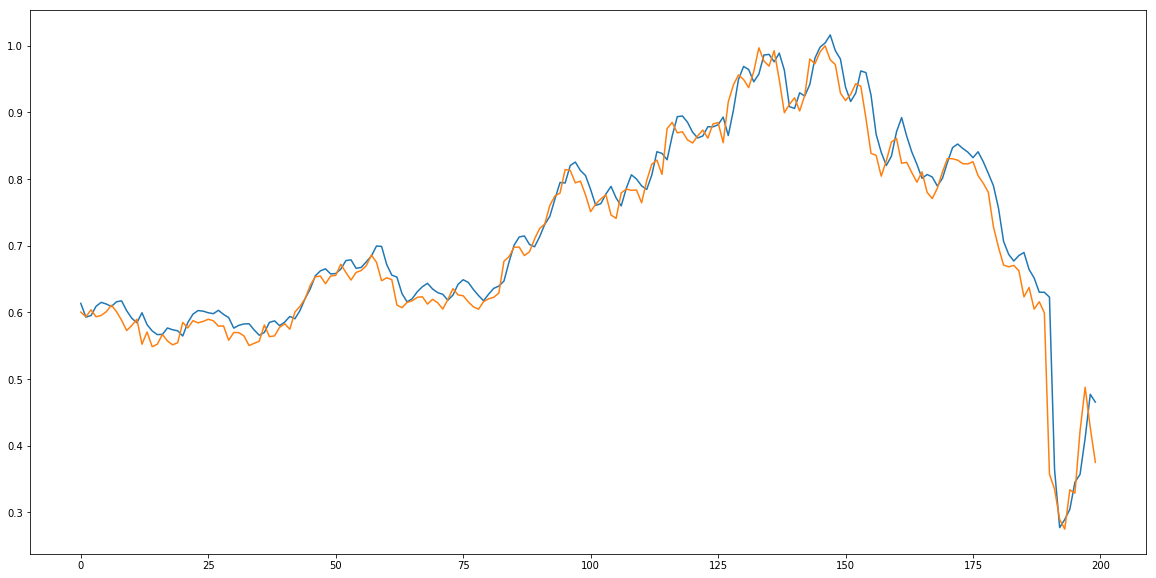

In [11]:
mse_score = mean_squared_error (y_test,pred)
print(mse_score)

plt.figure(figsize=(20,10))
plt.plot(pred)
plt.plot(y_test)
plt.show()

# plt.savefig(rpath+"\RNN output figure.png")
prediction = pd.DataFrame({'pred':pred.reshape(-1),'actual':y_test})
prediction.to_csv(rpath+"\\LSTM ouput.csv")


In [ ]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

_ = model_score(model, X_train, y_train, X_test, y_test)

Reference:

https://github.com/krishnaik06/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ/blob/master/rnn.py

https://www.kaggle.com/code/benjibb/lstm-stock-prediction-20170507/notebook
